In [1]:
#Import libraries
import pytz
import numpy as np
import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas_ta as ta
import MetaTrader5 as mt5
from datetime import datetime, timedelta
from tensorflow.keras.models import save_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [2]:
""" 
Dataframe (You can made it if you have a MT5 account. For FREE)
"""
import warnings
warnings.filterwarnings('ignore')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Initialize connection to the MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =", mt5.last_error())
    quit()

symbol_1 = "EURUSD"
symbol_2 = "USDJPY"
symbol_3 = "XAGUSD"
symbol_4 = "XAUUSD"
two_hours = timedelta(hours=7, minutes=1)

now = datetime(2024, 10, 1)
# Retrieve monthly, weekly, and daily data 
#For Crypto you may use LTCUSD ETHUSD SOLUSD BTCUSD
a = mt5.copy_rates_range(symbol_1, mt5.TIMEFRAME_M15, datetime(2020, 1, 1), now)
b = mt5.copy_rates_range(symbol_1, mt5.TIMEFRAME_M5, datetime(2020, 1, 1), now) 
c = mt5.copy_rates_range(symbol_1, mt5.TIMEFRAME_M1, datetime(2021, 1, 1), now) 
d = mt5.copy_rates_range(symbol_1, mt5.TIMEFRAME_H1, datetime(2000, 1, 1), now)

# Create DataFrames
df_a = pd.DataFrame(a)
df_b = pd.DataFrame(b)
df_c = pd.DataFrame(c)
df_d = pd.DataFrame(d)
#Truncate the data
lenght_1 = len(df_a)
df_b = df_b.tail(lenght_1)

# Calculate RSI and EMA
df_a['rsi'] = ta.rsi(df_a['close'], length=8)
df_a['ema'] = ta.ema(df_a['close'], length=22)
df_b['rsi'] = ta.rsi(df_b['close'], length=8)
df_b['ema'] = ta.ema(df_b['close'], length=22)
df_c['rsi'] = ta.rsi(df_c['close'], length=8)
df_c['ema'] = ta.ema(df_c['close'], length=22)
df_d['rsi'] = ta.rsi(df_d['close'], length=8)
df_d['ema'] = ta.ema(df_d['close'], length=22)


# Fill NaN values
df_a['rsi'].fillna(df_a['rsi'].mean(), inplace=True)
df_a['ema'].fillna(df_a['ema'].mean(), inplace=True)
df_b['rsi'].fillna(df_b['rsi'].mean(), inplace=True)
df_b['ema'].fillna(df_b['ema'].mean(), inplace=True)
df_c['rsi'].fillna(df_c['rsi'].mean(), inplace=True)
df_c['ema'].fillna(df_c['ema'].mean(), inplace=True)
df_d['rsi'].fillna(df_d['rsi'].mean(), inplace=True)
df_d['ema'].fillna(df_d['ema'].mean(), inplace=True)

# Retrieve monthly, weekly, and daily data
x = mt5.copy_rates_range(symbol_2, mt5.TIMEFRAME_M15, datetime(2018, 1, 1), now)
y = mt5.copy_rates_range(symbol_2, mt5.TIMEFRAME_M5, datetime(2020, 1, 1), now) 
w = mt5.copy_rates_range(symbol_2, mt5.TIMEFRAME_M1, datetime(2021, 1, 1), now) 
z = mt5.copy_rates_range(symbol_2, mt5.TIMEFRAME_H1, datetime(2000, 1, 1), now)
# Create DataFrames
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)
df_w = pd.DataFrame(w)
df_z = pd.DataFrame(z)
#Truncate the data
lenght = len(df_x)
df_y = df_y.tail(lenght)

# Calculate RSI and EMA
df_x['rsi'] = ta.rsi(df_x['close'], length=8)
df_x['ema'] = ta.ema(df_x['close'], length=22)
df_y['rsi'] = ta.rsi(df_y['close'], length=8)
df_y['ema'] = ta.ema(df_y['close'], length=22)
df_w['rsi'] = ta.rsi(df_w['close'], length=8)
df_w['ema'] = ta.ema(df_w['close'], length=22)
df_z['rsi'] = ta.rsi(df_z['close'], length=8)
df_z['ema'] = ta.ema(df_z['close'], length=22)
# Fill NaN values
df_x['rsi'].fillna(df_x['rsi'].mean(), inplace=True)
df_x['ema'].fillna(df_x['ema'].mean(), inplace=True)
df_y['rsi'].fillna(df_y['rsi'].mean(), inplace=True)
df_y['ema'].fillna(df_y['ema'].mean(), inplace=True)
df_w['rsi'].fillna(df_w['rsi'].mean(), inplace=True)
df_w['ema'].fillna(df_w['ema'].mean(), inplace=True)
df_z['rsi'].fillna(df_z['rsi'].mean(), inplace=True)
df_z['ema'].fillna(df_z['ema'].mean(), inplace=True)

# Retrieve monthly, weekly, and daily data
m15_amzn = mt5.copy_rates_range(symbol_3, mt5.TIMEFRAME_M15, datetime(2018, 1, 1), now)
m5_amzn = mt5.copy_rates_range(symbol_3, mt5.TIMEFRAME_M5, datetime(2020, 1, 1), now) 
m1_amzn = mt5.copy_rates_range(symbol_3, mt5.TIMEFRAME_M1, datetime(2021, 1, 1), now) 
h1_amzn = mt5.copy_rates_range(symbol_3, mt5.TIMEFRAME_H1, datetime(2000, 1, 1), now)
# Create DataFrames
df_m15_amzn = pd.DataFrame(m15_amzn)
df_m5_amzn = pd.DataFrame(m5_amzn)
df_m1_amzn = pd.DataFrame(m1_amzn)
df_h1_amzn = pd.DataFrame(h1_amzn)
#Truncate the data
lenght_2 = len(df_m15_amzn)
df_m5_amzn = df_m5_amzn.tail(lenght_2)

# Calculate RSI and EMA
df_m15_amzn['rsi'] = ta.rsi(df_m15_amzn['close'], length=8)
df_m15_amzn['ema'] = ta.ema(df_m15_amzn['close'], length=22)
df_m5_amzn['rsi'] = ta.rsi(df_m5_amzn['close'], length=8)
df_m5_amzn['ema'] = ta.ema(df_m5_amzn['close'], length=22)
df_m1_amzn['rsi'] = ta.rsi(df_m1_amzn['close'], length=8)
df_m1_amzn['ema'] = ta.ema(df_m1_amzn['close'], length=22)
df_h1_amzn['rsi'] = ta.rsi(df_h1_amzn['close'], length=8)
df_h1_amzn['ema'] = ta.ema(df_h1_amzn['close'], length=22)
# Fill NaN values
df_m15_amzn['rsi'].fillna(df_m15_amzn['rsi'].mean(), inplace=True)
df_m15_amzn['ema'].fillna(df_m15_amzn['ema'].mean(), inplace=True)
df_m5_amzn['rsi'].fillna(df_m5_amzn['rsi'].mean(), inplace=True)
df_m5_amzn['ema'].fillna(df_m5_amzn['ema'].mean(), inplace=True)
df_m1_amzn['rsi'].fillna(df_m1_amzn['rsi'].mean(), inplace=True)
df_m1_amzn['ema'].fillna(df_m1_amzn['ema'].mean(), inplace=True)
df_h1_amzn['rsi'].fillna(df_h1_amzn['rsi'].mean(), inplace=True)
df_h1_amzn['ema'].fillna(df_h1_amzn['ema'].mean(), inplace=True)

j = mt5.copy_rates_range(symbol_4, mt5.TIMEFRAME_M15, datetime(2018, 1, 1), now)
k = mt5.copy_rates_range(symbol_4, mt5.TIMEFRAME_M5, datetime(2020, 1, 1), now) 
l = mt5.copy_rates_range(symbol_4, mt5.TIMEFRAME_M1, datetime(2021, 1, 1), now) 
m = mt5.copy_rates_range(symbol_4, mt5.TIMEFRAME_H1, datetime(2000, 1, 1), now)
# Create DataFrames
df_j = pd.DataFrame(j)
df_k = pd.DataFrame(k)
df_l = pd.DataFrame(l)
df_m = pd.DataFrame(m)
#Truncate the data
lenght_3 = len(df_j)
df_k = df_k.tail(lenght_3)

#Create the RSI and EMA during a timestamp of 15 dayd and 22 days respectivelly
# Calculate RSI and EMA
df_j['rsi'] = ta.rsi(df_j['close'], length=8)
df_j['ema'] = ta.ema(df_j['close'], length=22)
df_k['rsi'] = ta.rsi(df_k['close'], length=8)
df_k['ema'] = ta.ema(df_k['close'], length=22)
df_l['rsi'] = ta.rsi(df_l['close'], length=8)
df_l['ema'] = ta.ema(df_l['close'], length=22)
df_m['rsi'] = ta.rsi(df_m['close'], length=8)
df_m['ema'] = ta.ema(df_m['close'], length=22)
# Fill NaN values
df_j['rsi'].fillna(df_j['rsi'].mean(), inplace=True)
df_j['ema'].fillna(df_j['ema'].mean(), inplace=True)
df_k['rsi'].fillna(df_k['rsi'].mean(), inplace=True)
df_k['ema'].fillna(df_k['ema'].mean(), inplace=True)
df_l['rsi'].fillna(df_l['rsi'].mean(), inplace=True)
df_l['ema'].fillna(df_l['ema'].mean(), inplace=True)
df_m['rsi'].fillna(df_m['rsi'].mean(), inplace=True)
df_m['ema'].fillna(df_m['ema'].mean(), inplace=True)

""" 
I know It's a long DF. You can reduce the size if desired
"""

Num GPUs Available:  1


" \nI know It's a long DF. You can reduce the size if desired\n"

In [3]:
""" 
Use the best Technical Indicators 
Forex / Commodities: open high low close ema obv
Crypto: open high low close ema obv

"""
# Use technical indicators (Optimized)
df_c = df_c.copy()
df_c['obv'] = ta.obv(df_c['close'], df_c['tick_volume'])
df_c['obv'].fillna(df_c['obv'].mean(), inplace=True)


df_l = df_l.copy()
df_l['obv'] = ta.obv(df_l['close'], df_l['tick_volume'])
df_l['obv'].fillna(df_l['obv'].mean(), inplace=True)

m1_amzn = df_m1_amzn.copy()  # Ensure m1_amzn is a copy, not a view
m1_amzn['obv'] = ta.obv(m1_amzn['close'], m1_amzn['tick_volume'])
m1_amzn['obv'].fillna(m1_amzn['obv'].mean(), inplace=True)


df_w = df_w.copy()  # Ensure m1_amzn is a copy, not a view
df_w['obv'] = ta.obv(df_w['close'], df_w['tick_volume'])
df_w['obv'].fillna(df_w['obv'].mean(), inplace=True)

columns_to_drop = ['time', 'tick_volume', 'spread', 'real_volume', 'rsi']
df = pd.concat([df_c, df_w, df_l, m1_amzn], ignore_index=True)
df.drop(columns=columns_to_drop, inplace=True)
df.corrwith(df["close"])

open     1.000000
high     1.000000
low      1.000000
close    1.000000
ema      1.000000
obv      0.433612
dtype: float64

In [5]:
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(df.values.reshape((-1, 1)))

# Function to create the dataset
def create_dataset(dataset, N=60):
    X, Y = [], []
    for i in range(len(dataset) - N):
        X.append(dataset[i:i + N])
        Y.append(dataset[i + N, -1])
    return np.array(X), np.array(Y)

# Apply the new function
N = 60
X_train, y_train = create_dataset(train_scaled, N)



X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1).astype('float32')
y_train = y_train.reshape(y_train.shape[0], 1).astype('float32')

#Test With Different Shapes
# X_train = X_train[:1000000]
# y_train = y_train[:1000000]
# X_train = X_train[-1000000:]
# y_train = y_train[-1000000:]

print("Train shapes for X and y respectivelly", X_train.shape, y_train.shape)
print("Train sizes for X and y respectivelly", X_train.size, y_train.size)
print('Full train Lenght', len(train_scaled))

Train shapes for X and y respectivelly (32649552, 60, 1) (32649552, 1)
Train sizes for X and y respectivelly 1958973120 32649552
Full train Lenght 32649612


In [ ]:
""" 
For Bayesian Optimization (Get the Best Model)
"""

# # Ensure data scaling and dataset creation outside objective
# test = mt5.copy_rates_range('XAUUSD', mt5.TIMEFRAME_M1, datetime(2024, 9, 1), datetime.now())
# test = pd.DataFrame(test)
# test_1 = test['close'].tail(84000)
# scaler = MinMaxScaler()
# test_scaled = scaler.fit_transform(np.array(test_1).reshape(-1, 1))

# # Define a function to create dataset
# def create_dataset(data, N):
#     X, y = [], []
#     for i in range(len(data)-N):
#         X.append(data[i:i+N])
#         y.append(data[i+N])
#     return np.array(X), np.array(y)

# N = 60  # Set the value of N
# _, X_test = create_dataset(test_scaled, N=N)
# _, y_test = create_dataset(test_scaled, N=N)

# #RESHAPE FOR PREDICTIONS
# elements_two = X_test.size
# divisible_two = (elements_two // 120) * 120
# X_predict_shape = X_test[:divisible_two]
# X_test = X_predict_shape.reshape(-1, 60, 1)

# elements_one = y_test.size
# divisible_one = (elements_one // 120) *120
# y_predict_shape = y_test[:divisible_one]
# y_test = y_predict_shape.reshape(-1, 60, 1)

# # Define the model creation function
# def create_model(units_1, units_2, units_3, units_4, dropout_rate, learning_rate):
#     model = Sequential()
#     model.add(LSTM(units_1, return_sequences=True, input_shape=(N, 1)))
#     model.add(Dropout(dropout_rate))
#     model.add(LSTM(units_2, return_sequences=True))
#     model.add(Dropout(dropout_rate))
#     model.add(LSTM(units_3, return_sequences=False))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(units_4))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1))
#     model.compile(loss='huber', optimizer=Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999), metrics=['mae', 'RootMeanSquaredError'])
#     return model

# # Define the objective function for Hyperopt
# def objective(params):
#     units_1 = int(params['units_1'])
#     units_2 = int(params['units_2'])
#     units_3 = int(params['units_3'])
#     units_4 = int(params['units_4'])
#     dropout_rate = params['dropout_rate']
#     learning_rate = params['learning_rate']

#     model = create_model(units_1, units_2, units_3, units_4, dropout_rate, learning_rate)
#     model.summary()
#     early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    
#     model.fit(X_train, y_train,  validation_split=0.2, epochs=5, batch_size=350, callbacks=[early_stopping], verbose=0)
#     predictions = model.predict(X_test)

#     predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
#     y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))  # Using a different variable to avoid confusion

#     window_size = 75  # Adjust the window size as needed
#     y_pred_smooth = np.convolve(predictions.flatten(), np.ones(window_size)/window_size, mode='valid')

#     min_length = min(len(y_test_scaled), len(y_pred_smooth))
#     y_test_scaled = y_test_scaled[:min_length]
#     y_pred_smooth = y_pred_smooth[:min_length]

#     r2 = r2_score(y_test_scaled, y_pred_smooth)
#     model.summary()
#     print("R2: ", r2)
#     return {'loss': -r2, 'status': STATUS_OK}

# # Define the search space for hyperparameters
# space = {
#     'units_1': hp.quniform('units_1', 15, 288, 1),
#     'units_2': hp.quniform('units_2', 15, 144, 1),
#     'units_3': hp.quniform('units_3', 15, 72, 1),
#     'units_4': hp.quniform('units_4', 15, 36, 1),
#     'dropout_rate': hp.uniform('dropout_rate', 0.2, 0.5),
#     'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.01))
# }

# # Run the optimization
# trials = Trials()
# best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=25, trials=trials)
# print("Best hyperparameters:", best)

In [ ]:
""" 
Achilles Architecture
"""
from keras.utils import plot_model #(40/30/30) (40, 30, 25)
#Create the model (Optimized)
model = Sequential()
model.add(LSTM(256, return_sequences=True, recurrent_activation='sigmoid', activation='tanh', recurrent_dropout=0, unroll=False, use_bias=True, input_shape=(N, 1))) #(X_train.shape[1], 1) also works fine
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=True, recurrent_activation='sigmoid', activation='tanh', recurrent_dropout=0, unroll=False, use_bias=True))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=True, recurrent_activation='sigmoid', activation='tanh', recurrent_dropout=0, unroll=False, use_bias=True))
model.add(Dropout(0.3))

#Try adding more layers for optimization
# model.add(LSTM(15, recurrent_activation='sigmoid', activation='tanh', return_sequences=False, recurrent_dropout=0, unroll=False, use_bias=True))
# model.add(Dropout(0.27))
# model.add(LSTM(17, recurrent_activation='sigmoid', activation='tanh', return_sequences=True, recurrent_dropout=0, unroll=False, use_bias=True))
# model.add(Dropout(0.2))
# model.add(LSTM(10, recurrent_activation='sigmoid', activation='tanh', return_sequences=True, recurrent_dropout=0, unroll=False, use_bias=True))
# model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=True, recurrent_activation='sigmoid', activation='tanh', recurrent_dropout=0, unroll=False, use_bias=True))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()
#Compile the model 
model.compile(
loss='mean_squared_error',
optimizer=Adam(learning_rate=0.00013,  beta_1=0.9, beta_2=0.999), 
metrics=['mae', keras.metrics.RootMeanSquaredError()],
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 256)           264192    
                                                                 
 dropout_4 (Dropout)         (None, 60, 256)           0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 128)           197120    
                                                                 
 dropout_5 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 64)            49408     
                                                                 
 dropout_6 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 32)           

In [ ]:
# # Split dataset into training and validation
# train_size = int(0.8 * len(X_train))
# val_size = len(X_train) - train_size
# X_train, X_val = X_train[:train_size], X_train[train_size:]
# y_train, y_val = y_train[:train_size], y_train[train_size:]

# # Training dataset
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# train_dataset = train_dataset.batch(64).prefetch(tf.data.experimental.AUTOTUNE)  # Batch and prefetch

# # Validation dataset
# val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
# val_dataset = val_dataset.batch(64).prefetch(tf.data.experimental.AUTOTUNE)  # Batch and prefetch

# # Cache the dataset for faster retrieval
# train_dataset = train_dataset.cache()
# val_dataset = val_dataset.cache()

# warnings.filterwarnings('ignore')
# callbacks = [
#     EarlyStopping(patience=5, restore_best_weights=True),
#     ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.00013)
# ]                                 
# history = model.fit(train_dataset, epochs=5, validation_data=val_dataset, callbacks=[callbacks], verbose=1)
# val_loss = min(history.history['val_loss'])
# print(val_loss)


Epoch 1/5
326496/326496 [==============================] - 6977s 21ms/step - loss: 7.9167e-05 - mae: 0.0040 - root_mean_squared_error: 0.0089 - val_loss: 0.0021 - val_mae: 0.0126 - val_root_mean_squared_error: 0.0461 - lr: 1.3000e-04
Epoch 2/5
326496/326496 [==============================] - 7397s 23ms/step - loss: 7.8217e-05 - mae: 0.0040 - root_mean_squared_error: 0.0088 - val_loss: 0.0021 - val_mae: 0.0125 - val_root_mean_squared_error: 0.0456 - lr: 1.3000e-04
Epoch 3/5
326496/326496 [==============================] - 7353s 23ms/step - loss: 7.7937e-05 - mae: 0.0039 - root_mean_squared_error: 0.0088 - val_loss: 0.0023 - val_mae: 0.0134 - val_root_mean_squared_error: 0.0479 - lr: 1.3000e-04
Epoch 4/5
326496/326496 [==============================] - 7224s 22ms/step - loss: 7.7907e-05 - mae: 0.0039 - root_mean_squared_error: 0.0088 - val_loss: 0.0024 - val_mae: 0.0137 - val_root_mean_squared_error: 0.0488 - lr: 1.3000e-04
Epoch 5/5
326496/326496 [==============================] - 7701s

In [7]:
warnings.filterwarnings('ignore')
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=3, min_lr=0.00013)
]                                 
history = model.fit(X_train, y_train, epochs=15, batch_size=360, validation_split=0.2, verbose=1)
val_loss = min(history.history['val_loss'])
print(val_loss)

Epoch 1/15
111274/111274 [==============================] - 3788s 34ms/step - loss: 4.5579e-04 - mae: 0.0058 - root_mean_squared_error: 0.0213 - val_loss: 9.0967e-07 - val_mae: 6.7365e-04 - val_root_mean_squared_error: 9.5369e-04
Epoch 2/15
111274/111274 [==============================] - 3816s 34ms/step - loss: 1.0617e-04 - mae: 0.0037 - root_mean_squared_error: 0.0103 - val_loss: 2.9396e-06 - val_mae: 0.0015 - val_root_mean_squared_error: 0.0017
Epoch 3/15
111274/111274 [==============================] - 4004s 36ms/step - loss: 1.0485e-04 - mae: 0.0036 - root_mean_squared_error: 0.0102 - val_loss: 6.1160e-07 - val_mae: 4.9775e-04 - val_root_mean_squared_error: 7.8199e-04
Epoch 4/15
111274/111274 [==============================] - 3995s 36ms/step - loss: 1.0417e-04 - mae: 0.0036 - root_mean_squared_error: 0.0102 - val_loss: 4.0489e-06 - val_mae: 9.9449e-04 - val_root_mean_squared_error: 0.0020
Epoch 5/15
111274/111274 [==============================] - 3992s 36ms/step - loss: 1.0377e-

In [ ]:
"""
PRECAUTION WITH WHAT YOU SAVE
"""
save_model(model, 'AchillesV1keras', overwrite=True)

In [ ]:
if mt5.initialize():
    # Replace with your login credentials
    mt5.login(login="Login", server="Server", password="Your Password")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 40)            6720      
                                                                 
 dropout_3 (Dropout)         (None, 60, 40)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 25)            6600      
                                                                 
 dropout_4 (Dropout)         (None, 60, 25)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 20)            3680      
                                                                 
 dropout_5 (Dropout)         (None, 60, 20)            0         
                                                                 
 dense_1 (Dense)             (None, 60, 1)            

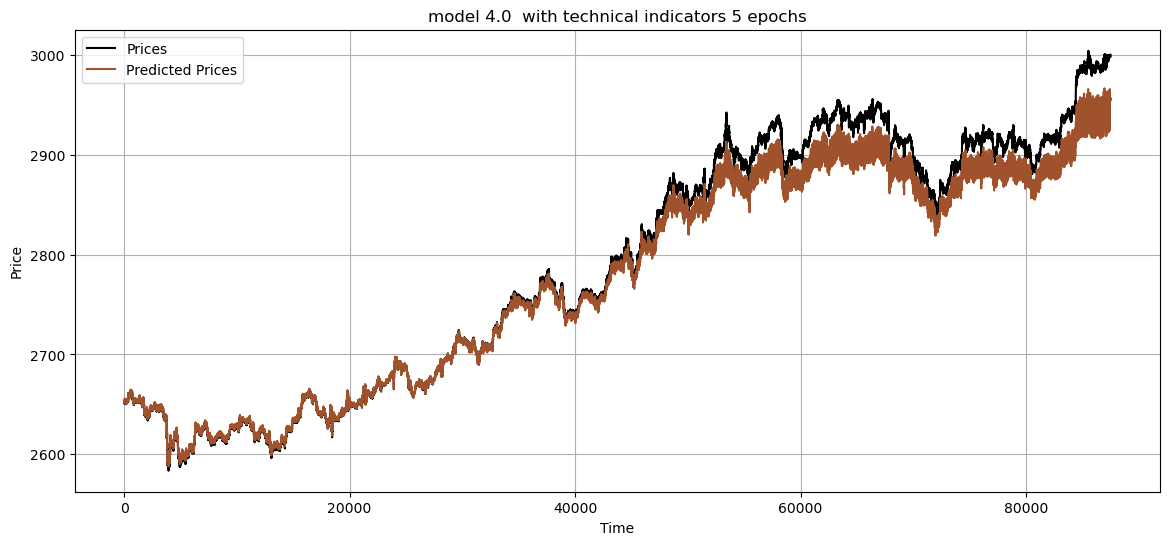

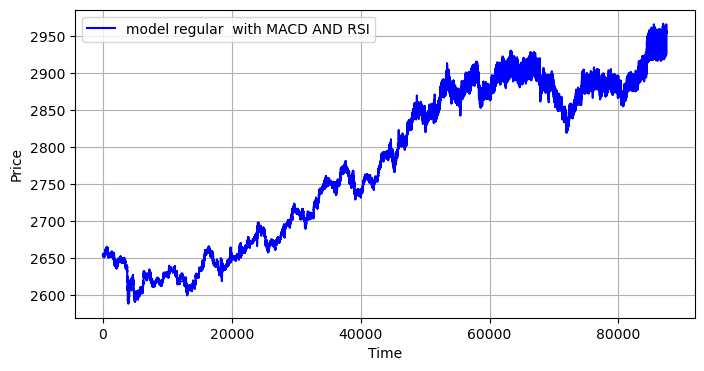

3.693126126487275
0.004697581721081143
0.9757503574307886


In [7]:
""" 
Check the Predictions
"""
#Bring the Model into account
model_1 = keras.models.load_model(r"C:\Users\Angel\OneDrive\Escritorio\Vs Code\Achilles\AchillesV1.keras")
model_1.summary()
#CREATE A THE TEST DF
now = datetime.now()
test = mt5.copy_rates_range('XAUUSD', mt5.TIMEFRAME_M1, datetime(2024, 10, 1), now)
test = pd.DataFrame(test)
test_1 = test['close'].tail(87600) #87600 Minures (One Month)
# Moving average with a window size of 3
test_scaled = scaler.fit_transform(np.array(test_1).reshape(-1, 1))

N = 60
_, X_test = create_dataset(test_scaled, N=N)
_, y_test = create_dataset(test_scaled, N=N)

#RESHAPE FOR PREDICTIONS
elements_two = X_test.size
divisible_two = (elements_two // 120) * 120
X_predict_shape = X_test[:divisible_two]
X_test = X_predict_shape.reshape(-1, 60, 1)

elements_one = y_test.size
divisible_one = (elements_one // 120) *120
y_predict_shape = y_test[:divisible_one]
y_test = y_predict_shape.reshape(-1, 60, 1)

#Make Predictions
y_pred = model_1.predict(X_test)

#Inverse scaling
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_real = scaler.inverse_transform(y_test.reshape(-1, 1))

#You can smooth the results if desired
window_size = 1  # Adjust the window size as needed
y_pred_smooth = np.convolve(y_pred.flatten(), np.ones(window_size)/window_size, mode='valid')

# Plot the results
now = datetime.now()
sixty_days = now + timedelta(days=60)
sixty_days = sixty_days.replace(microsecond=0)
date_range = pd.date_range(start=now.replace(microsecond=0), end=sixty_days, freq='1min')
date_range = date_range[date_range.dayofweek < 5]
time_df = pd.DataFrame(date_range)
rows = len(time_df)
print(f"Number of rows: {(rows)}")
plt.figure(figsize=(14, 6))
plt.plot(y_real, label='Prices', color='black')
plt.plot(y_pred_smooth, label='Predicted Prices', color='sienna')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('model 4.0  with technical indicators 5 epochs')
plt.grid(True)
plt.legend()
plt.show()


#PLot the predictions closer to see if the model is predicting good
plt.figure(figsize=(8, 4))
plt.plot(y_pred_smooth, color='blue', label='model regular  with MACD AND RSI')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()
min_length = min(len(y_real), len(y_pred_smooth))
y_real = y_real[:min_length]
y_pred_smooth =y_pred_smooth[:min_length]
print(np.sqrt(mean_absolute_error(y_true=y_real, y_pred=y_pred_smooth)))
print(mean_absolute_percentage_error(y_true=y_real, y_pred=y_pred_smooth))
print(r2_score(y_true=y_real, y_pred=y_pred_smooth))